In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

# NLP tools
import nltk

In [2]:
# The data path of input file
data_path = "FIFA 19 complete player dataset.csv"

# Read csv file to pandas dataframe
players_df = pd.read_csv(data_path)
players_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 可以注意到，這一些數據中其實有許多標籤是沒有用的
所以我們必須要刪除這些字段

由下一段程式碼來進行處理

In [3]:
players_df = players_df.drop(columns=['ID','Photo','Club Logo','Work Rate','Body Type','Real Face','Loaned From',
                                     'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',
                                     'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'])
players_df = players_df.drop(players_df.columns[0], axis=1)
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      16654 non-null object
Contract Valid Until        17918 non-nul

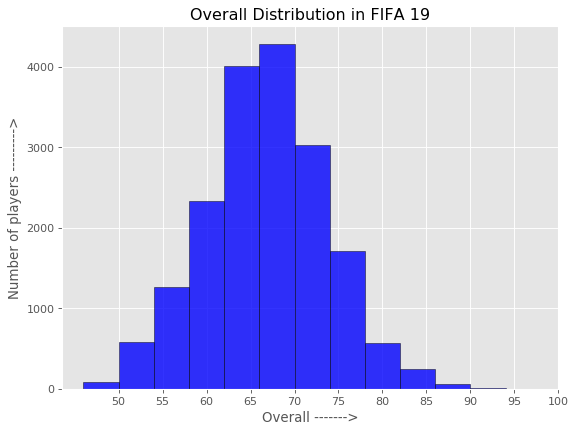

In [4]:
overall = list(players_df.loc[:,"Overall"])
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.hist(overall, bins=12, ec='black', alpha=0.8, color='blue')
    plt.xlabel("Overall ------->")
    plt.ylabel("Number of players --------->")
    plt.xticks([50,55,60,65,70,75,80,85,90,95,100])
    plt.title("Overall Distribution in FIFA 19")
    plt.show()

### FIFA 19 整體上是金字塔形的分佈，最多的球員集中在 65 到 70 之間

Text(0.5, 1.0, 'Range of Forward Overalls')

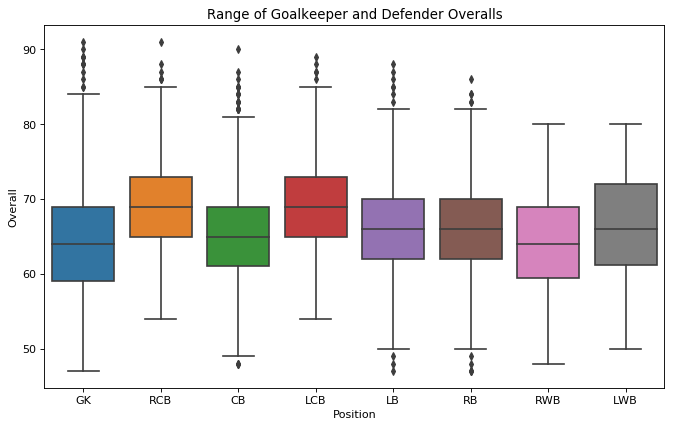

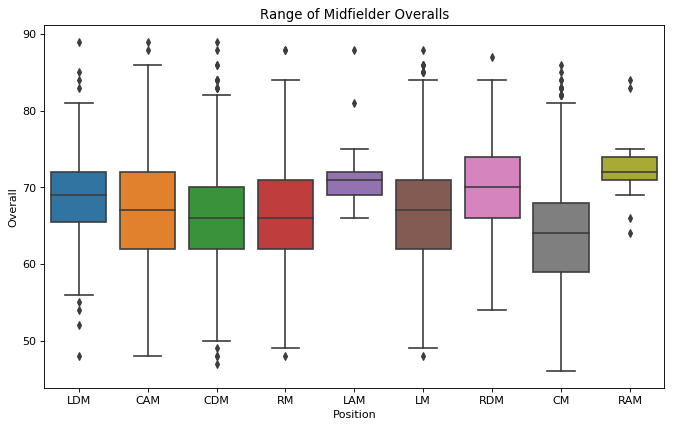

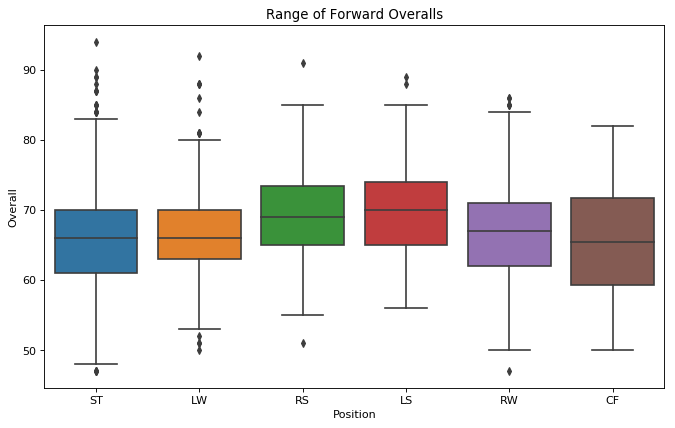

In [5]:
gk_defenders = players_df.loc[players_df['Position'].isin(['GK','RWB','RB','RCB','CB','LCB','LB','LWB'])]
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x= gk_defenders['Position'], y=gk_defenders['Overall']).set_title('Range of Goalkeeper and Defender Overalls')

midfielders = players_df.loc[players_df['Position'].isin(['RM','CM','LM','CDM','RDM','LDM','RAM','CAM','LAM'])]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=midfielders['Position'],y=midfielders['Overall']).set_title('Range of Midfielder Overalls')

forwards = players_df.loc[players_df['Position'].isin(['RW','CF','LW','ST','RS','LS'])]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=forwards['Position'], y=forwards['Overall']).set_title('Range of Forward Overalls')

助教講到的**箱線圖（Boxplot）**可以找出異常值

之後分析資料的時候可以把這一些異常值給移除掉

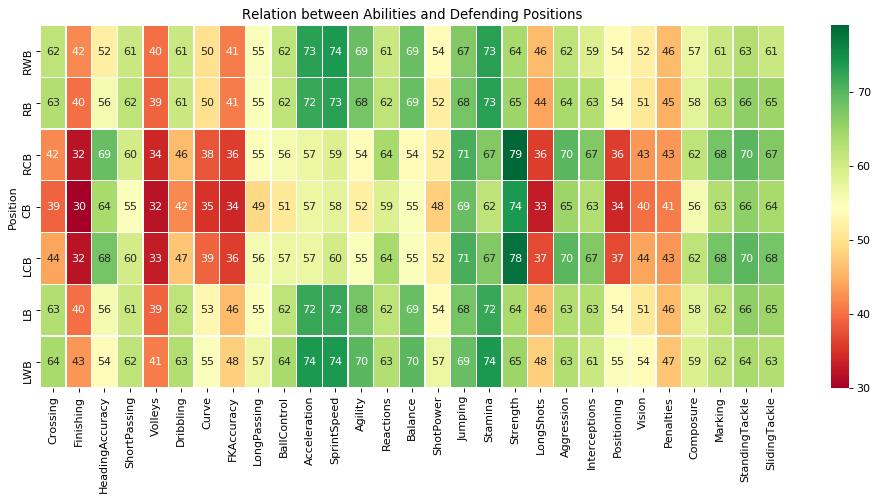

In [6]:
heatmap_df = players_df.filter(['Position','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
                               'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility',
                                'Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression',
                               'Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
                               'SlidingTackle']).groupby('Position').mean()
heatmap_df_defenders = heatmap_df.loc[['RWB','RB','RCB','CB','LCB','LB','LWB']]
heatmap_df_defenders = heatmap_df_defenders.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_defenders,annot=heatmap_df_defenders,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Defending Positions')
plt.show()

助教講到的**熱圖（Heatmap）**是一種很好的可視化圖

用於描述數據框中不同特徵之間的依賴關係

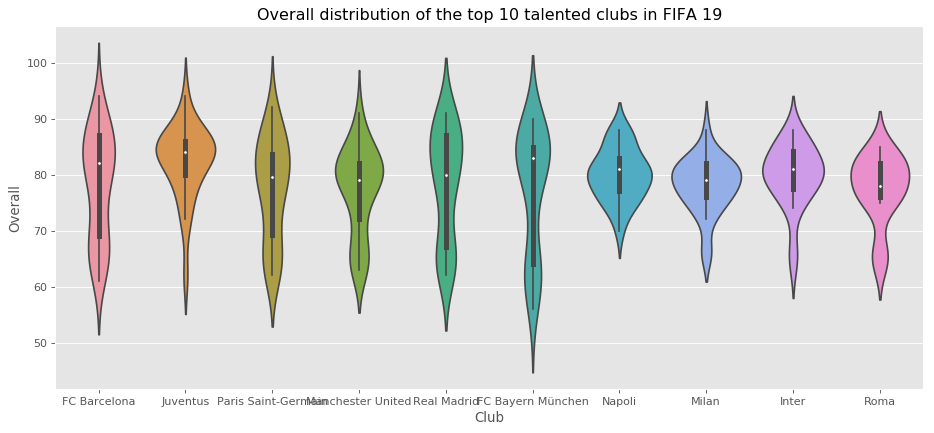

In [7]:
talented_df = players_df.filter(['Name', 'Club', 'Overall'])
talented_df = talented_df.groupby('Club').mean()
talented_df = talented_df.sort_values(by=['Overall'], ascending=False)
talented_df = talented_df[:10]
talented_clubs = talented_df.index.values
players_talented_clubs = players_df.filter(['Name','Club','Overall'])
players_talented_clubs = players_talented_clubs.loc[players_talented_clubs['Club'].isin(talented_clubs)]
players_talented_clubs
with plt.style.context('ggplot'):
    figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    sns.violinplot(x= players_talented_clubs['Club'], y=players_talented_clubs['Overall']).set_title('Overall distribution of the top 10 talented clubs in FIFA 19')

助教講到的**小提琴圖（Violinplot）**和前面提到的**箱線圖（Boxplot）**是差不多的功能

可以找出異常值

之後分析資料的時候可以把這一些異常值給移除掉